## DATA ANALYSIS OF GOOGLE APP'S RATINGS




##### Importing the libraries which are required.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Reading the CSV file

In [2]:
google_data=pd.read_csv('Google-Playstore.csv')

In [3]:
google_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [4]:
google_data.shape

(1118136, 23)

In [13]:
google_data.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,1.111286e+06,1.111286e+06,1.117975e+06,1.118136e+06,1.118136e+06
mean,2.490334e+00,5.159633e+03,3.136432e+05,5.444534e+05,2.050728e-01
std,2.053973e+00,2.724094e+05,2.043941e+07,3.031058e+07,3.541011e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.600000e+02,0.000000e+00
50%,3.600000e+00,1.100000e+01,1.000000e+03,1.719000e+03,0.000000e+00
75%,4.300000e+00,1.000000e+02,1.000000e+04,1.911600e+04,0.000000e+00
max,5.000000e+00,1.253808e+08,1.000000e+10,1.077270e+10,4.000000e+02


In [14]:
google_data.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

### Data Cleaning

##### Check how many ratings are more than 5 - Outliers

In [15]:
google_data[google_data.Rating > 5]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice


###### There are no columns with Rating > 5

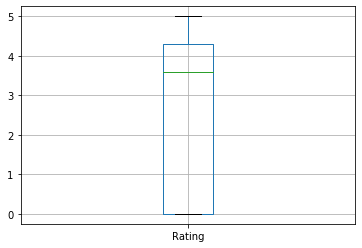

In [17]:
google_data.boxplot(column=['Rating'], return_type='axes');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022625973088>]],
      dtype=object)

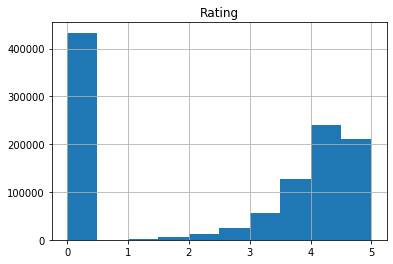

In [19]:
google_data.hist(column=['Rating'])

##### Remove columns that are 90% empty

In [20]:
threshold = len(google_data)* 0.1
threshold

111813.6

In [21]:
google_data.dropna(thresh=threshold, axis=1, inplace=True)

In [22]:
print(google_data.isnull().sum())

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64


### Data Imputation and Manipulation

#### Filling the null values with appropriate values using aggregate functions such as mean, median or mode.


In [23]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [24]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [25]:
#count the number of null values in each column
google_data.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                    0
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

##### As we can see the Rating column no longer has a null value.

In [29]:
### Let's convert Price, Rating Count and Installs into Numerical Values
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Rating Count'] = pd.to_numeric(google_data['Rating Count'], errors='coerce')

In [30]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [31]:
google_data.head(10)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,100000.0,100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,1000000.0,1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,50000000.0,50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,100000000.0,100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,50000.0,50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False
5,eCharge+,com.innogy.echarge,Maps & Navigation,3.5,377.0,10000.0,10000.0,38029,True,0.0,...,innogy eMobility Solutions,http://www.innogy-emobility.com,echarge@innogy.com,"Feb 4, 2019","Nov 06, 2020",Everyone,https://www.innogy.com/web/cms/en/3068482/home...,False,False,False
6,Jobonji: hire local pros handyman for odd jobs...,com.pack.jobonji,Lifestyle,4.4,3346.0,100000.0,100000.0,224897,True,0.0,...,"Jobonji, Inc",https://www.jobonji.com/,support@jobonji.com,"Jan 10, 2018","Sep 30, 2019",Everyone,https://www.jobonji.com/privacy.html,False,True,False
7,Little Panda’s Dream Town,com.sinyee.babybus.village,Educational,4.0,44700.0,10000000.0,10000000.0,29969311,True,0.0,...,BabyBus,http://www.babybus.com,ser@babybus.com,"Aug 16, 2018","Sep 29, 2020",Everyone,http://en.babybus.com/index/privacyPolicy.shtml,True,True,False
8,Baby Panda: Dental Care,com.sinyee.babybus.dentistII,Educational,4.1,10990.0,10000000.0,10000000.0,12520805,True,0.0,...,BabyBus,https://www.babybus.com,sinyeeandroid@gmail.com,"Apr 27, 2020","Sep 29, 2020",Everyone,http://en.babybus.com/index/privacyPolicy.shtml,True,True,False
9,Excel Reader,com.xcelfilereaderMS,Tools,3.3,1141.0,100000.0,100000.0,193274,True,0.0,...,SphereLix Apps,NaN,johnmarting6162@gmail.com,"Jan 13, 2020","Jun 25, 2020",Everyone,https://docs.google.com/document/d/e/2PACX-1vS...,True,False,False


### Data Visualization


In [32]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Rating Count'].agg(np.mean)
print(x)
print(y)
print(z)

Category
Action                     3.208758
Adventure                  3.120733
Arcade                     2.782580
Art & Design               1.939296
Auto & Vehicles            2.294354
Beauty                     1.704009
Board                      3.156890
Books & Reference          2.599881
Business                   1.716780
Card                       3.422593
Casino                     3.525227
Casual                     2.929943
Comics                     2.997894
Communication              2.491001
Dating                     2.739299
Education                  2.467796
Educational                2.786160
Entertainment              2.447893
Events                     1.308791
Finance                    2.702479
Food & Drink               1.495724
Health & Fitness           2.099990
House & Home               1.561370
Libraries & Demo           2.518472
Lifestyle                  2.372246
Maps & Navigation          2.550029
Medical                    2.192162
Music              

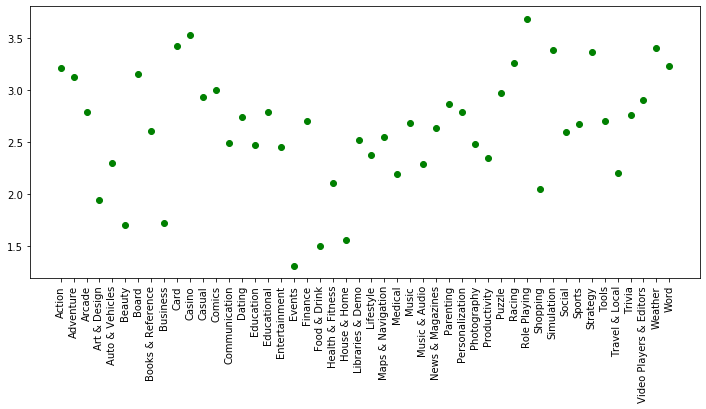

In [33]:
plt.figure(figsize=(12,5))
plt.plot(x, "ro", color='g')
plt.xticks(rotation=90)
plt.show()

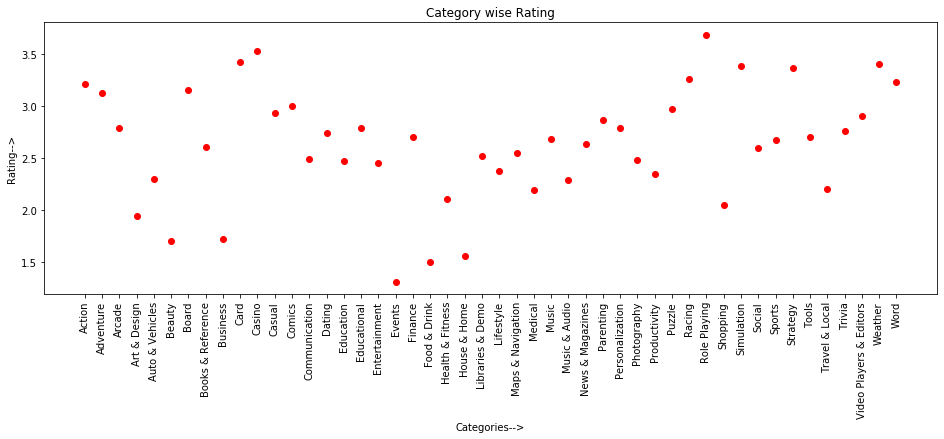

In [34]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

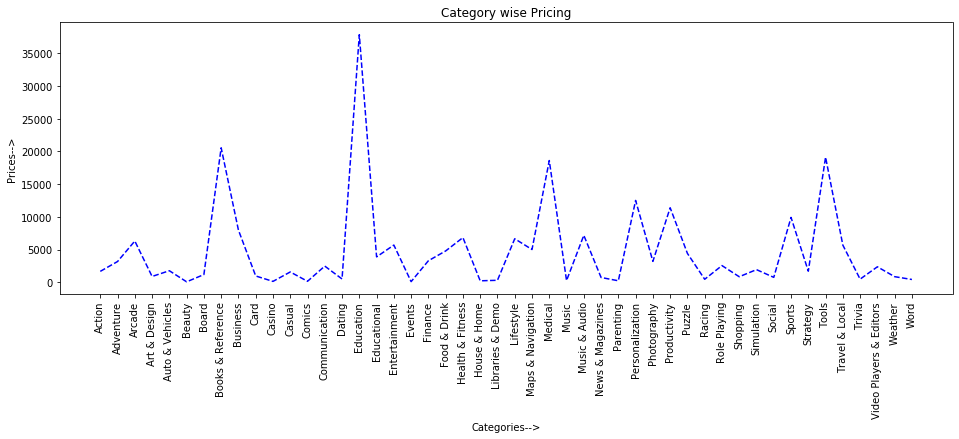

In [35]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

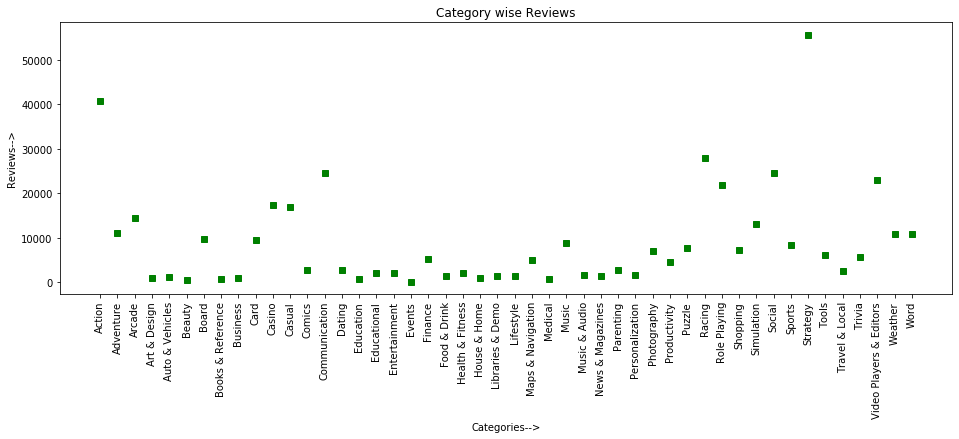

In [37]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()